In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [29]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y = True) 
# (return_X_y) splits the dataset into target and features array
# X,y assign to each array

In [ ]:
# X is Features of the dataset
# Y is the label or target values 
# The goal is to learn a mapping from the features X to the target values y,
# so that given new unseen data points, you can predict their corresponding labels.

In [31]:
# Creating Model

In [45]:
from sklearn.neighbors import KNeighborsRegressor  # bulit-in Machine model
# from sklearn.linear_model import LinearRegression # another bulit-in Machine Model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [59]:
mod = KNeighborsRegressor().fit(X,y)  # Model Object  mod.fit(X,y)  # you can't mod.predict untill you fit your data

pipe = Pipeline([
    ("scale",StandardScaler()),
    ("model",KNeighborsRegressor())
])
# Pipeline is a Model with mutiple things that itself learn ex:(scaling+Kneighbors)

In [51]:
pipe.fit(X,y)  # the pipeline here will train and fit the scaling itself 

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [54]:
pred = mod.predict(X)

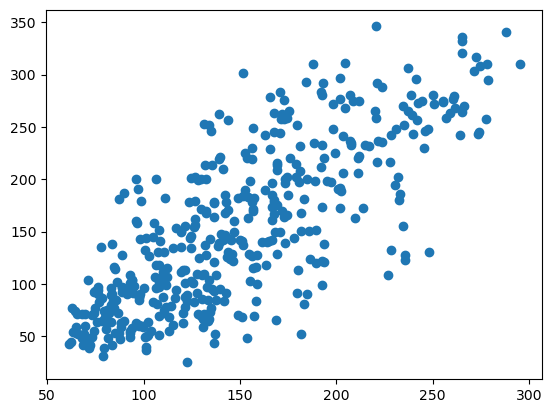

In [55]:
plt.scatter(pred,y)
plt.show()

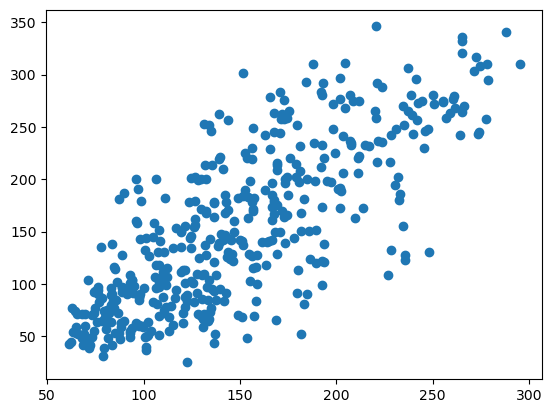

In [58]:
pred = pipe.predict(X)
plt.scatter(pred,y)
plt.show()
# With pipe.predict it should scale if x and y are very different in scaling 
# but this dataset don't have different x-y so they don't diff alot with pipeline

In [61]:
#-----------GridSearchCV------------#

In [60]:
from sklearn.model_selection import GridSearchCV

In [63]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [70]:
mod = GridSearchCV(estimator=pipe,
            param_grid= {'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
            cv=3 ) 
# estimator is a model that have a .fit().predict()
# param_girid represent all settings that we like to go over in the pipleline for example (n_neighbors)
# cv = cross-validation
# The basic idea behind cross-validation is to split the available data into multiple subsets, 
# where one subset is used for testing the model, and the remaining subsets are used for training. 

In [74]:
mod.fit(X,y)
pd.DataFrame(mod.cv_results_)
# We do this so we can determine which model n neighbors is best suited for our model (rank_test_score = 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.000000,0.000000,1,{'model__n_neighbors': 1},0.105976,0.124092,-0.158523,0.023849,0.129168,10
1,0.000000,0.000000,0.010414,0.007364,2,{'model__n_neighbors': 2},0.268889,0.339379,0.264563,0.290944,0.034295,9
2,0.000000,0.000000,0.005208,0.007365,3,{'model__n_neighbors': 3},0.333057,0.382744,0.356899,0.357567,0.020290,8
3,0.005218,0.007380,0.000000,0.000000,4,{'model__n_neighbors': 4},0.342407,0.404701,0.409910,0.385673,0.030668,6
4,0.000000,0.000000,0.005195,0.007346,5,{'model__n_neighbors': 5},0.358865,0.377198,0.412549,0.382871,0.022280,7
5,0.000000,0.000000,0.000000,0.000000,6,{'model__n_neighbors': 6},0.372665,0.389923,0.436389,0.399659,0.026911,5
6,0.005207,0.007364,0.000000,0.000000,7,{'model__n_neighbors': 7},0.412584,0.393681,0.446147,0.417471,0.021696,4
7,0.000000,0.000000,0.005219,0.007380,8,{'model__n_neighbors': 8},0.414478,0.409779,0.485850,0.436702,0.034806,3
8,0.005196,0.007348,0.000000,0.000000,9,{'model__n_neighbors': 9},0.414191,0.412035,0.528462,0.451563,0.054383,2
9,0.000000,0.000000,0.005207,0.007364,10,{'model__n_neighbors': 10},0.408989,0.405303,0.544371,0.452888,0.064706,1
